In [292]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import os
import json
import pandas as pd


In [293]:

# Directory containing JSON files
data_dir = "data"

# List to store the processed records
records = []

# Loop through all JSON files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(".json"):
        file_path = os.path.join(data_dir, filename)
        
        # Load JSON data
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)  # Assuming each file contains a list of entries
            
            # Process each entry in the JSON file
            
            runner_info = data['runner_info']
            record = data['record']
                
                # Extract HM Time from cpid = 5
            hm_time = None
            if 'cp' in record and '5' in record['cp']:
                hm_time = record['cp']['5'].get('raceTime')

                # Add extracted data to the records list
            records.append({
                'Bib Number': runner_info.get('Bib Number'),
                'Name': runner_info.get('Name'),
                'Group': runner_info.get('Group'),
                'Gender': runner_info.get('Gender'),
                'Net Time': runner_info.get('Net Time'),
                'HM Time': hm_time
            })

# Convert the list of records to a pandas DataFrame
df = pd.DataFrame(records)

# Display the resulting DataFrame
print(df)

     Bib Number        Name    Group Gender  Net Time   HM Time
0        010779  DA BUI VAN  男40-49歲      男  03:35:55  01:40:42
1        006357         詹文豪  男40-49歲      男  03:40:07  01:45:22
2        001492         游瑞萍  女50-59歲      女  05:01:36  02:24:15
3        003155         廖仲豪  男40-49歲      男  03:55:46  01:57:35
4        004690         彭任瑩  男30-39歲      男  03:30:59  01:46:11
...         ...         ...      ...    ...       ...       ...
9390     010428         陳亮竹  男30-39歲      男  05:00:41  01:58:49
9391     006006         李照偉  男50-59歲      男  04:10:18  02:03:03
9392     001239         黃慶昌  男40-49歲      男  03:31:39  01:43:51
9393     003204         呂振華  男50-59歲      男  03:37:13  01:47:58
9394     009609         徐焱鴻  男40-49歲      男  03:44:25  01:52:23

[9395 rows x 6 columns]


In [294]:
len(df)

9395

In [300]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'race_results.csv'

# Import the CSV file into a DataFrame
df = pd.read_csv(file_path)


In [301]:
len(df)

8098

In [302]:
rank_all = df["Rank All"].astype(int)
rank_diff = rank_all.diff()  # Compute differences
gaps = rank_diff[rank_diff > 1]

print("Gaps in rank sequence:")
print(gaps)

Gaps in rank sequence:
3292    2.0
3293    2.0
4516    2.0
Name: Rank All, dtype: float64


In [304]:
df['Skipped'] = df['Rank All'].diff() != 1

# Identify where numbers are skipped
skipped_rows = df[df['Skipped']]

print("Rows where continuity is broken:")
print(skipped_rows)


Rows where continuity is broken:
      Bib Number             Name Category Official Time  Rank All  Net Time  \
0              1  Brimin KIPKORIR    男國際選手      02:11:41         1  02:11:39   
3292        9436              黃禮濤  男30-39歲      03:48:49      3294  03:44:49   
3293       10122            常松 信壯    男60歲+      03:48:51      3296  03:47:02   
4516        5757              向偉俊  男20-29歲      04:04:25      4520  03:59:25   

      Skipped  
0        True  
3292     True  
3293     True  
4516     True  


In [312]:
# Display the first few rows of the DataFrame
print(df.head())
# Convert 'Net Time' to hours (handling NaN values)
def time_to_hours(time_str):
    if pd.isna(time_str):  # Handle missing values
        return None
    h, m, s = map(int, time_str.split(':'))
    return h + m / 60 + s / 3600

df['Net Time (Hours)'] = df['Net Time'].apply(time_to_hours)
# Remove rows where Net Time (Hours) is 0
df = df[df['Net Time (Hours)'] != 0]


   Bib Number                      Name Category Official Time  Rank All  \
0           1           Brimin KIPKORIR    男國際選手      02:11:41         1   
1           2     Gadisa Birhanu SHUMIE    男國際選手      02:11:54         2   
2           9  Okubay Tsegay GEBRETNSAE    男國際選手      02:12:00         3   
3           5       Enyew Mekonnen ALEM    男國際選手      02:12:13         4   
4        9182      Jeremia Njenga Njeri  男30-39歲      02:12:41         5   

   Net Time  Skipped  
0  02:11:39     True  
1  02:11:54    False  
2  02:11:58    False  
3  02:12:10    False  
4  02:12:39    False  


In [226]:
df

,Bib Number,Name,Group,Gender,Net Time,HM Time,Net Time (Hours)
0,010779,DA BUI VAN,男40-49歲,男,03:35:55,01:40:42,3.598611
1,006357,詹文豪,男40-49歲,男,03:40:07,01:45:22,3.668611
2,001492,游瑞萍,女50-59歲,女,05:01:36,02:24:15,5.026667
3,003155,廖仲豪,男40-49歲,男,03:55:46,01:57:35,3.929444
4,004690,彭任瑩,男30-39歲,男,03:30:59,01:46:11,3.516389
...,...,...,...,...,...,...,...
9390,010428,陳亮竹,男30-39歲,男,05:00:41,01:58:49,5.011389
9391,006006,李照偉,男50-59歲,男,04:10:18,02:03:03,4.171667
9392,001239,黃慶昌,男40-49歲,男,03:31:39,01:43:51,3.527500
9393,003204,呂振華,男50-59歲,男,03:37:13,01:47:58,3.620278


In [314]:
df[df['Bib Number']==1541]

,Bib Number,Name,Category,Official Time,Rank All,Net Time,Skipped,Net Time (Hours)
7259,1541,翁嘉璘,女30-39歲,05:01:56,7263,04:56:54,False,4.948333


In [308]:
df['Bib Number']

0          1
1          2
2          9
3          5
4       9182
        ... 
8093    1338
8094    5572
8095    3207
8096    3275
8097    5323
Name: Bib Number, Length: 8098, dtype: int64

In [70]:
unique_bibs = df['Group'].nunique()
print(f"Number of unique Bib Numbers: {unique_bibs}")

unique_bib_list = df['Group'].unique()
print(f"Unique Bib Numbers: {unique_bib_list}")

Number of unique Bib Numbers: 12
Unique Bib Numbers: ['男40-49歲' '女50-59歲' '男30-39歲' '男50-59歲' '女40-49歲' '女30-39歲' '女60歲+'
 '女20-29歲' '男60歲+' '男20-29歲' '男視障選手' '男19歲-']


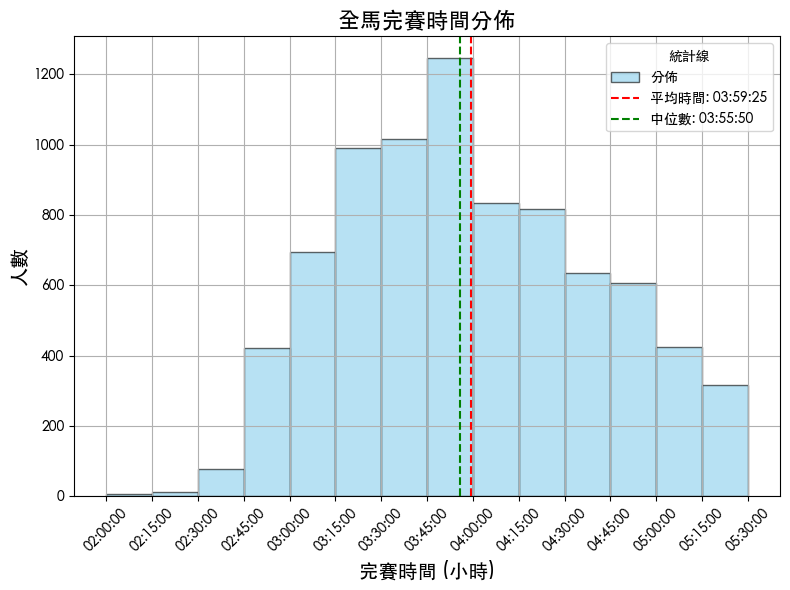

In [288]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy.stats import mode

# Configure Chinese font
rcParams['font.sans-serif'] = ['Heiti TC']  # Use 'SimHei' for Chinese characters
rcParams['axes.unicode_minus'] = False    # Ensure minus sign displays correctly

# Drop NaN values in 'Net Time (Hours)'
df = df.dropna(subset=['Net Time (Hours)'])

# Calculate mean, median, and mode
mean_time = df['Net Time (Hours)'].mean()
median_time = df['Net Time (Hours)'].median()

# Define bin edges (from 2.0 to 5.5, step 0.25)
bins = np.arange(2.0, 5.75, 0.25)

# Plotting Net Time distribution
plt.figure(figsize=(8, 6))

# Histogram
plt.hist(df['Net Time (Hours)'], bins=bins, alpha=0.6, edgecolor='black', color='skyblue', label='分佈')

# Vertical lines for mean, median, and mode
plt.axvline(mean_time, color='red', linestyle='--', linewidth=1.5, label=f'平均時間: {int(mean_time):02}:{int((mean_time%1)*60):02}:{int(((mean_time*60)%1)*60):02}')
plt.axvline(median_time, color='green', linestyle='--', linewidth=1.5, label=f'中位數: {int(median_time):02}:{int((median_time%1)*60):02}:{int(((median_time*60)%1)*60):02}')

# Custom X-axis labels (HH:MM:SS format)
xticks = np.arange(2.0, 5.75, 0.25)
xtick_labels = [f'{int(t):02}:{int((t%1)*60):02}:{int(((t*60)%1)*60):02}' for t in xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Add labels, title, and legend
plt.title('全馬完賽時間分佈', fontsize=16)         # Title in Chinese
plt.xlabel('完賽時間 (小時)', fontsize=14)     # X-axis label in Chinese
plt.ylabel('人數', fontsize=14)            # Y-axis label in Chinese
plt.legend(title='統計線', fontsize=10)       # Legend in Chinese
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [117]:
df['Net Time (Hours)'].mode().values[0]

3.9105555555555553

In [280]:
mode_time

2.9991666666666665

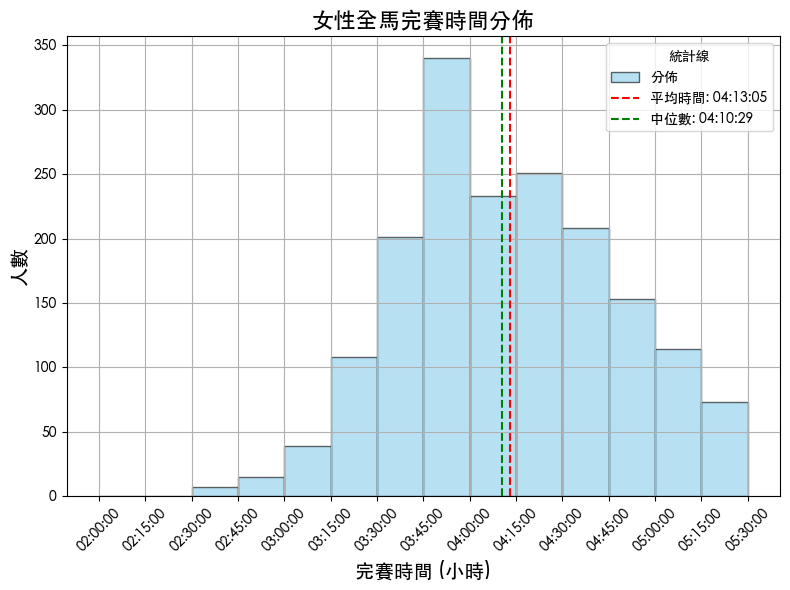

In [313]:
%matplotlib inline
# Filter data for a single gender (e.g., "男")
gender_to_plot = '女'
filtered_df = df[df["Category"].str.contains(f'{gender_to_plot}')]


# Configure Chinese font
rcParams['font.sans-serif'] = ['Heiti TC']  # Use 'SimHei' for Chinese characters
rcParams['axes.unicode_minus'] = False    # Ensure minus sign displays correctly

# Calculate mean and median
mean_time = filtered_df['Net Time (Hours)'].mean()
median_time = filtered_df['Net Time (Hours)'].median()
# Plot the data
plt.figure(figsize=(8, 6)
          )
# Histogram
plt.hist(filtered_df['Net Time (Hours)'], bins=bins, alpha=0.6, edgecolor='black', color='skyblue', label='分佈')

# Vertical lines for mean and median
plt.axvline(mean_time, color='red', linestyle='--', linewidth=1.5, label=f'平均時間: {int(mean_time):02}:{int((mean_time%1)*60):02}:{int(((mean_time*60)%1)*60):02}')
plt.axvline(median_time, color='green', linestyle='--', linewidth=1.5, label=f'中位數: {int(median_time):02}:{int((median_time%1)*60):02}:{int(((median_time*60)%1)*60):02}')


# Custom X-axis labels (HH:MM:SS format)
xticks = np.arange(2.0, 5.75, 0.25)
xtick_labels = [f'{int(t):02}:{int((t%1)*60):02}:{int(((t*60)%1)*60):02}' for t in xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Add labels, title, and legend
plt.title(f'{gender_to_plot}性全馬完賽時間分佈', fontsize=16)         # Title in Chinese
plt.xlabel('完賽時間 (小時)', fontsize=14)     # X-axis label in Chinese
plt.ylabel('人數', fontsize=14)            # Y-axis label in Chinese
plt.legend(title='統計線', fontsize=10)       # Legend in Chinese
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


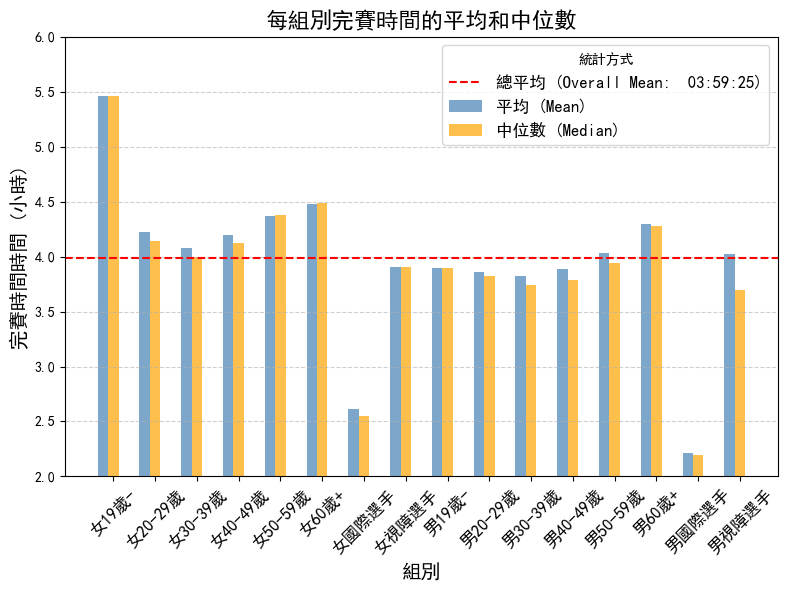

In [289]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import mode

# Configure Chinese font
rcParams['font.sans-serif'] = ['SimHei']  # Use 'SimHei' for Chinese characters
rcParams['axes.unicode_minus'] = False    # Ensure minus sign displays correctly

# Drop rows with missing Net Time
df = df.dropna(subset=['Net Time (Hours)'])

# Calculate mean, median, and mode Net Time per group
group_stats = df.groupby('Category')['Net Time (Hours)'].agg(['mean', 'median']).reset_index()
group_stats['mode'] = df.groupby('Category')['Net Time (Hours)'].apply(lambda x: mode(x)[0]).values

# Calculate overall average
overall_mean = df['Net Time (Hours)'].mean()

# Plot the data
plt.figure(figsize=(8, 6))
bar_width = 0.25
x = range(len(group_stats))

# Bar chart for mean
plt.bar([i - bar_width for i in x], group_stats['mean'], width=bar_width, label='平均 (Mean)', alpha=0.7, color='steelblue')

# Bar chart for median
plt.bar(x, group_stats['median'], width=bar_width, label='中位數 (Median)', alpha=0.7, color='orange')


# Add a horizontal line for overall average
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'總平均 (Overall Mean:  {int(overall_mean):02}:{int((overall_mean%1)*60):02}:{int(((overall_mean*60)%1)*60):02})')

# Add labels and title
plt.xticks(x, group_stats['Category'], fontsize=12, rotation=45)  # Centered and rotated group names
plt.title('每組別完賽時間的平均和中位數', fontsize=16)  # Title in Chinese
plt.xlabel('組別', fontsize=14)                 # X-axis label in Chinese
plt.ylabel('完賽時間時間 (小時)', fontsize=14)         # Y-axis label in Chinese
plt.ylim(2., 6)                                # Set Y-axis range
plt.legend(fontsize=12, title='統計方式')         # Legend in Chinese
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


In [29]:
np.median(df['Net Time (Hours)'])

3.9355555555555557

In [15]:
nan_rows = df[df['Net Time (Hours)'].isna()]
print(nan_rows)

     Bib Number Name    Group Gender Net Time   HM Time  Net Time (Hours)
5          1003  呂勃陞  男30-39歲      男      NaN  02:03:00               NaN
20         1002  呂哲宇  男30-39歲      男      NaN  02:02:27               NaN
28         1004  謝昌熹  男40-49歲      男      NaN  01:38:50               NaN
30         1001  邱仁韋  男30-39歲      男      NaN  01:46:18               NaN
509        2001  許家豪  男20-29歲      男      NaN  02:35:40               NaN
510        2002  鄭志偉  男40-49歲      男      NaN  01:40:16               NaN
511        2003  李嘉文  男30-39歲      男      NaN  02:15:15               NaN
512        2004  吳欣陽  男40-49歲      男      NaN  02:03:01               NaN


In [291]:

# Configure Chinese font
rcParams['font.sans-serif'] = ['Heiti TC']  # Use 'SimHei' for Chinese characters
rcParams['axes.unicode_minus'] = False    # Ensure minus sign displays correctly

# Filter data: single gender and Net Time < 3.5
gender_to_plot = '男'
filtered_df = df[(df['Net Time (Hours)'] < 3.5)]

# Count occurrences of each group
group_counts = filtered_df['Category'].value_counts()

# Calculate percentages
group_percentages = group_counts / group_counts.sum() * 100

# Threshold to group smaller fractions as 'Rest'
threshold = 2  # Group small fractions less than 2% as 'Rest'

# Identify small groups
small_groups = group_counts[group_percentages < threshold]

# Create a new group for small fractions and add them to the original data
if not small_groups.empty:
    group_counts = group_counts.append(pd.Series({'Rest': small_groups.sum()}))

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_counts, 
        labels=group_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors,
        labeldistance=1.1,       # Move labels further out to avoid overlap
        pctdistance=0.85,        # Move percentages closer to the center
        textprops={'fontsize': 12, 'fontweight': 'bold'})  # Adjust font size

# Title in Chinese
plt.title(f'{gender_to_plot}性別中淨時間介於2.5 - 3小時的組別分佈', fontsize=14)
plt.show()


AttributeError: 'Series' object has no attribute 'append'

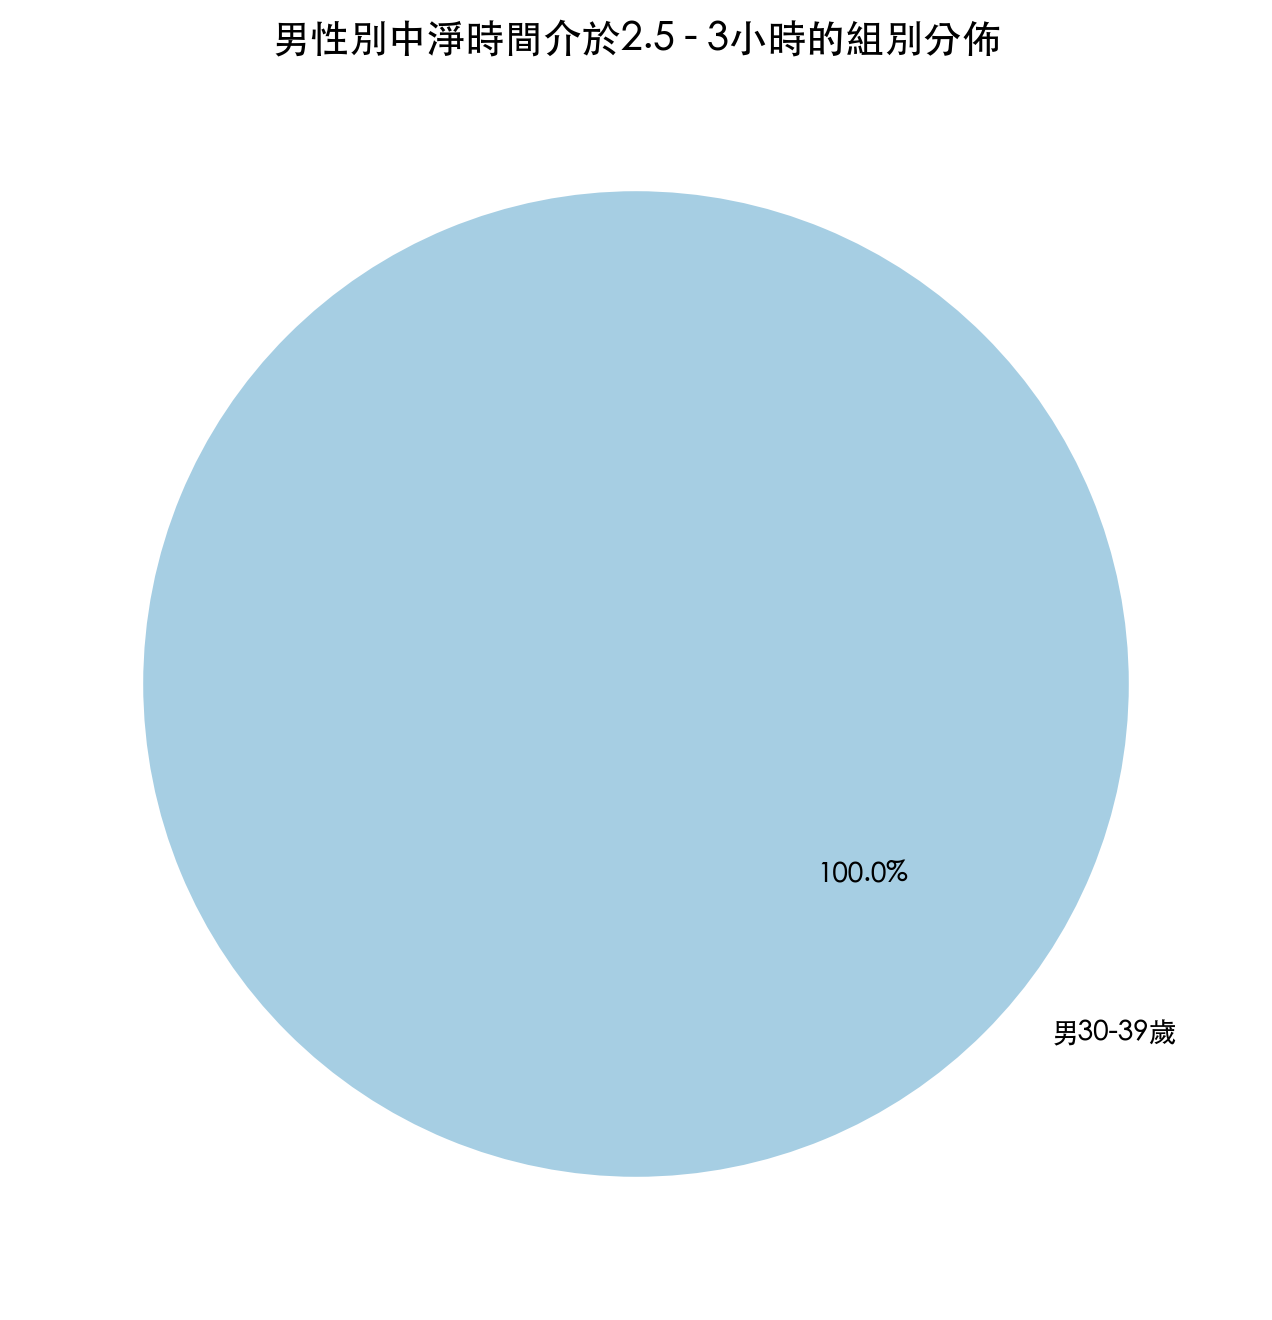

In [87]:
# Configure Chinese font
rcParams['font.sans-serif'] = ['Heiti TC']  # Use 'SimHei' for Chinese characters
rcParams['axes.unicode_minus'] = False    # Ensure minus sign displays correctly

# Filter data: single gender and Net Time < 3
gender_to_plot = '男'
filtered_df = df[(df['Gender'] == gender_to_plot) & (df['Net Time (Hours)'] < 2.5)]

# Count occurrences of each group
group_counts = filtered_df['Group'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title(f'{gender_to_plot}性別中淨時間介於2.5 - 3小時的組別分佈', fontsize=14)  # Title in Chinese
plt.show()

In [66]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.transform import dodge
from bokeh.io import output_notebook

output_notebook()

# Prepare Data
source = ColumnDataSource(df)

# Overall Distribution
overall_hist, edges = np.histogram(df['Net Time (Hours)'], bins=8)
overall_fig = figure(title='總體淨時間分佈 (Overall Distribution)', x_axis_label='淨時間 (小時)', y_axis_label='人數 (Count)')
overall_fig.quad(top=overall_hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="steelblue", line_color="black", alpha=0.7)

# Group-wise Distribution
grouped = df.groupby('Group')
group_hist_fig = figure(title='按組別的淨時間分佈 (Group-wise Distribution)', x_axis_label='淨時間 (小時)', y_axis_label='人數 (Count)')
for group, group_data in grouped:
    hist, edges = np.histogram(group_data['Net Time (Hours)'], bins=8)
    group_hist_fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_alpha=0.7, legend_label=group)

group_hist_fig.legend.title = '組別 (Group)'

# Layout
layout = gridplot([[overall_fig, group_hist_fig]])
show(layout)


Loading BokehJS ...

In [267]:
bib_number_numpy = np.load('bibnr_values.npy').astype(int)
bib_number_pandas = df['Bib Number'].values.astype(int)


diff_bib_numbers = np.setdiff1d(bib_number_numpy, bib_number_pandas)

# Print out the differences
if len(diff_bib_numbers) > 0:
    print("Different bib numbers:", diff_bib_numbers)
else:
    print("No difference in bib numbers.")

Different bib numbers: [    1     2     5     8     9    53    55    56    57    60  1037  1105
  1133  1165  1166  1192  1193  1194  1195  1217  1218  1219  1220  1222
  1223  1224  1225  1267  1268  1269  1270  1293  1294  1295  1296  1328
  1329  1330  1394  1395  1396  1424  1425  2022  2023  2024  2025  2048
  2049  2050  2051  2073  2074  2118  2119  2123  2124  2129  2168  2169
  2175  2177  2184  2193  2194  2196  2201  2202  2205  2206  2207  2275
  2276  2277  2281  2282  2335  2336  2337  2373  2374  2386  2387  2388
  2394  2396  2399  2400  2401  2417  2418  2422  2423  2427  2428  2490
  2491  2502  2503  2544  2545  2546  2562  2563  2567  2568  2594  2595
  2596  2599  2600  2601  2612  2613  2617  2618  2629  2630  2631  2657
  2658  2689  2690  2691  2694  2695  2696  2697  3006  3018  3019  3020
  3045  3046  3047  3067  3068  3072  3073  3074  3075  3077  3089  3090
  3091  3106  3107  3131  3132  3133  3144  3145  3172  3173  3174  3176
  3184  3186  3202  3203  32

In [273]:
np.where(bib_number_numpy == 1105)

(array([2211]),)

In [272]:
bib_number_numpy[691]

1037

In [265]:
df[df['Bib Number'] == '001037']

,Bib Number,Name,Group,Gender,Net Time,HM Time,Net Time (Hours)


In [245]:
df[df['Bib Number'] == '013687']

,Bib Number,Name,Group,Gender,Net Time,HM Time,Net Time (Hours)
6088,013687,林存洲,男50-59歲,男,03:23:25,01:40:53,3.390278


In [248]:
df[df['Bib Number'] == '013685']

,Bib Number,Name,Group,Gender,Net Time,HM Time,Net Time (Hours)
3926,013685,林存洲,男50-59歲,男,03:23:25,01:40:53,3.390278


In [249]:
df[df['Bib Number'] == '013684']

,Bib Number,Name,Group,Gender,Net Time,HM Time,Net Time (Hours)
3090,013684,林存洲,男50-59歲,男,03:23:25,01:40:53,3.390278


In [256]:
unique_names_count = df['Net Time'].nunique()

In [257]:
unique_names_count

3052

In [260]:
duplicated_names = df[df['Net Time'].duplicated(keep=first)]

duplicated_names

NameError: name 'first' is not defined

In [201]:
len(b)

8098

In [320]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
import time

# Initialize the WebDriver (Make sure ChromeDriver is in your PATH)
driver = webdriver.Chrome()

try:
    # Navigate to the Wikipedia homepage
    driver.get('https://www.wikipedia.org/')
    print("Opened Wikipedia homepage")

    # Wait for the page to load completely
    time.sleep(2)

    # Locate the search bar
    search_bar = driver.find_element(By.ID, 'searchInput')

    # Create an ActionChain to perform mouse movement
    actions = ActionChains(driver)

    # Move the mouse to the search bar
    actions.move_to_element(search_bar).perform()
    print("Mouse moved to the search bar.")

    # Wait to observe the action
    time.sleep(5)

finally:
    # Close the browser
    driver.quit()
    print("Browser closed.")


Opened Wikipedia homepage
Mouse moved to the search bar.
Browser closed.


In [316]:
!pip install pyautogui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 132.6 kB/s eta 0:00:001m119.4 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.3/209.3 kB 196.2 kB/s eta 0:00:000:00:01m eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 306.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 264.0 kB/s eta 0:00:00 kB